# Evidencia 2. Proyecto de Ciencia de Datos

#### Mateo González Cosio Ríos y Valles
#### A01023938

#### 30 de Noviembre del 2020



## Introducción

La Ciencia de Datos se basa en la recolección y estudio de datos para poder llegar a encontrar patrones o modelos que nos pueden ayudar a tomar todo tipo de decisiones. Estas decisiones son más informadas y sostenibles ya que estas están formadas con un estudio previo en donde podemos simular los diferentes resultados que pueden ocurrir.

México ocupa el segundo lugar de obesidad en el mundo, y aun con los diferentes intentos que se han realizado para disminuir este fenómeno, la obesidad cada año se ve proyectada a incrementar. Con esto dicho muchas personas desconocen cómo cuidar de su alimentación y no se les es tan fácil recurrir a un nutriologo. 
Por este motivo creamos este proyecto en donde buscamos crear un modelo de regresión lineal múltiple en donde, después de una breve recopilación de datos, podamos guiarnos en lo que sí o no podemos ingerir en cierto momento. Esto nos ayudará bastante a concientizarnos de nuestros hábitos alimenticios y lograr mantener una dieta balanceada.
Con nuestro modelo podemos observar las diferentes implicaciones que tienen los carbohidratos, las proteínas y los lípidos que ingerimos en la cantidad de calorías que ingerimos dia con dia.

El prototipo como parte de este proyecto nos beneficia principalmente a nosotros ya que los datos que utiliza para crear el modelo son los nuestros. Pero esto no significa que no pueda beneficiar a nadie más. Este prototipo puede beneficiar a cualquiera que se tome el tiempo necesario para recopilar algunos datos alimenticios. Estos datos los podemos cargar a nuestro código para que el beneficiado sea el/ella.



## Funcionamiento

Nuestro código funciona de tal manera que con la carga de datos alimenticios (Los cuales deben de contener calorías, carbohidratos, lípidos y proteínas) podemos predecir la ingesta calórica diaria que tiene el usuario. Con esta predicción podemos identificar nuestros buenos y malos hábitos alimenticios.

Para desarrollar esta solución fue necesario conocer algunos aspectos de estadística, programación y Machine Learning. Ya que, aunque nuestro modelo puede ser recreado en aplicaciones como Excel, pero no con la misma facilidad y exactitud. Un concepto clave de programación que se utilizó para desarrollar este proyecto es el uso e importación de librerías, ya que sin ellas hubiéramos tenido que desarrollar cada modelo a desde cero, lo que es impráctico ya que lleva conocer programación y estadística avanzada.


In [ ]:
# La libreria sklearn esta enfocada en modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# La libreria Pandas nos ayuda a leer y ordenar nuestra informacion
import pandas as pd

# La libreria Numpy nos ayuda realizar calculos con nuestra inforamcion
import numpy as np

# La libreria Matplotlib nos ayuda a graficar nuesta informacion
import matplotlib.pyplot as plt

Ya con nuestras librerías cargadas correctamente podemos empezar a programar nuestra solución. El primer paso debe ser cargar nuestros datos y separarlos de tal manera que utilicemos cierta parte de nuestro datos para predecir otra. En este caso utilizaremos los carbohidratos, las proteínas, y los lípidos para predecir las calorías. Dentro de nuestros datos también se registró el consumo de sodio, pero debido a una prueba que se realizó en Excel a principios de la recopilación de datos, nos dimos cuenta que su implementación dentro de nuestro modelo no hacia el impacto suficiente para ser una variable relevante. Por este motivo decidimos descartar este prototipo.

In [ ]:
# Cargamos nuestro datos
data = pd.read_csv("A01023938_BaseDeDatosAnalisisRegresion.csv")

# Creamos nuestras variables dependienes e independientes.
x = data.iloc[:, [1,2,3]] # Carbohidratos, Proteinas y Lipidos
y = data.iloc[:, [0]]     # Calorias

# Creamos variables individuales para poder visualizar el efecto de cada una
xProt = pd.DataFrame(data, columns=['Proteina (g)'])
xCarb = pd.DataFrame(data, columns=['Carbohidratos (g)'])
xCal = pd.DataFrame(data, columns=['Calorias (kcal)']) 
xLip = pd.DataFrame(data, columns=['Lipidos (g)'])

Con nuestros datos cargados y separados correctamente debemos de definir el modelo que utilizaremos para poder hacer nuestra predicción. Como ya habíamos mencionado, utilizaremos regresión lineal. Esta funciona de tal manera que nosotros le proporcionamos una serie de puntos dentro de un plano de N dimensiones y el modelo crea una línea de tendencia basada en el promedio de distancia que hay entre cada punto.

In [ ]:
# Definimos nuestro modelo 
linreg = LinearRegression()

Ya que tenemos definido nuestro modelo podemos proporcionar los datos que previamente habíamos separado. Para asegurarnos que nuestro modelo esté funcionando adecuadamente utilizamos una función que elija una sección de nuestros datos para entrenar a nuestro modelo y otra para probar la eficiencia de nuestro modelo. Esto lo realizamos para cuando hagamos nuestra predicción saber que tan exacta es.

In [ ]:
# Entrenamos nuestro modelo 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.10, random_state=42)
linreg.fit(xTrain, yTrain)

# Hacemos una prediccion 
yPred = linreg.predict(xTest)

# Imprimimos los resultados
print("Modelo General")
print(f"Coeficientes: {linreg.coef_} ")
print(f"Intercept: {linreg.intercept_}")
print(f"Accuracy: {linreg.score(xTest, yTest)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(yTest, yPred))}")


Modelo General
Coeficientes: [[3.35540416e+00 9.33175360e-01 1.44770354e-03]] 
Intercept: [836.37123118]
Accuracy: 0.3046895187316847
Mean Squared Error: 359.39698680648945


## Resultados

Al imprimir los resultados de nuestro modelo podemos observar algunas cosas muy interesantes. La primera es nuestra ordenada al origen (Intercept). Este valor nos indica en qué punto nuestra línea de tendencia cruza el eje y. Esto se puede interpretar de tal manera que cuando nosotros no comemos ningún carbohidrato, proteína o lípido tenemos una ingesta calórica de 836.3. Pero esto no puede ser verdad ya que si no consumimos nada nuestra ingesta calórica será de 0.

Al igual podemos observar que la precisión (Accuracy) de nuestro modelo no es muy buena, siendo solo del 30%, lo que nos puede dar a concluir que nuestros datos no se relacionan de la mejor manera.

Los datos que se utilizaron para este prototipo fueron recolectados por un periodo de cuatro meses utilizando la aplicación "Lose It!". Y la mala precisión de nuestro modelo pudo ser ocasionado por muchas razones. Una de ellas que los datos no se hayan registrado de la mejor manera o que se necesite una mayor número de ellos. También puede ser que el modelo que elegimos para predecir dichos datos no haya sido el mejor.

Por esto, para comprender un poco mejor nuestros resultados, podemos hacer una regresión lineal individual de cada una de las variables independientes para ver cómo se relacionan con la predicción de ingesta calórica. (Esto se encontrara al final del documento)

Con las regresiones lineales de cada variable individual hechas podemos darnos cuenta que la variable que presentó mejor resultado fue los carbohidratos con un 33% de exactitud. Que este haya sido la exactitud más alta solo nos confirma que este no es el modelo ideal para nuestro tipo de datos. Estos resultados nos dejan pensando si se puede contestar nuestra hipótesis inicial: ¿Si consume cierta cantidad calórica, puede tener cambios en mi peso dentro de un determinado tiempo? La respuesta es que si, ya que aunque dentro de nuestro modelo no se pueda predecir de manera muy exacta cómo afectan los carbohidratos, proteínas y lípidos a nuestra ingesta calórica se puede ver claramente que entre más de ellos consumamos más ingesta calórica tendremos y consecuentemente más peso corporal agregaremos a nuestros cuerpos. Lo que puede resultar en sobrepeso si no nuestra alimentación no es cuidadosa.

Aunque nuestro proyecto no haya tenido el mejor resultado, llegamos a tener una mayor comprensión de cómo ciertos aspectos nutricionales afectan nuestra ingesta calórica y por ende, el control de nuestra masa corporal. Es por esto que la ciencia de datos es sumamente importante, ya que aunque no se haya llegado a la conclusión deseada el proceso de recopilación y análisis nos ha ayudado a hacer conciencia de nuestros hábitos alimenticios, lo que nos llevará a tomar decisiones más informadas en el futuro. Con esto es importante saber, ya que nos dimos cuenta que la ciencia de datos puede influenciar en nuestras decisiones futuras, el impacto que un modelo como estos puede tener en las personas. Así como en este proyecto utilizamos la ciencia de datos para influenciar a la gente a hacer bien, la ciencia de datos se puede utilizar para influenciar malas decisiones. Es por esto que siempre debemos de estar conscientes de los posibles efectos que pueden surgir de nuestros modelos y de cómo podemos ser influenciados por otros modelos. Siempre tenemos que ser conscientes de todos los datos que nosotros estamos generando y cómo estos pueden ser utilizados para nuestro bien o mal. 



Modelo de regresion de las Calorias


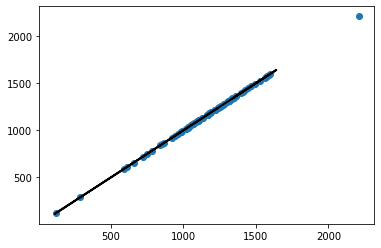

Accuracy: 1.0
Mean Squared Error: 2.444927891657081e-13


In [ ]:
# Regresion Lineal Simple de Calorias
print("Modelo de regresion de las Calorias")

# Train and Test
xTrain, xTest, yTrain, yTest, = train_test_split(xCal, y, test_size=.10, random_state=42)

# Fit and predict
linreg.fit(xTrain, yTrain)

# Make prediction
yPred = linreg.predict(xTest)

# Plot
plt.scatter(xTrain, yTrain)
plt.plot(xTest, yPred, color='black', linewidth=2)
plt.show()

print(f"Accuracy: {linreg.score(xTest, yTest)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(yTest, yPred))}")

Modelo de regresion de los Carbohidratos


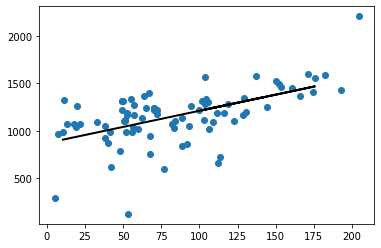

Accuracy: 0.33501921116685385
Mean Squared Error: 351.4710776673947


In [ ]:
# Regresion Lineal Simple de Carbphidratos
print("Modelo de regresion de los Carbohidratos")

# Train and Test
xTrain, xTest, yTrain, yTest, = train_test_split(xCarb, y, test_size=.10, random_state=42)

# Fit and predict
linreg.fit(xTrain, yTrain)

# Make prediction
yPred = linreg.predict(xTest)


# Plot
plt.scatter(xTrain, yTrain)
plt.plot(xTest, yPred, color='black', linewidth=2)
plt.show()

print(f"Accuracy: {linreg.score(xTest, yTest)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(yTest, yPred))}")

Modelo de regresion de las Proteinas


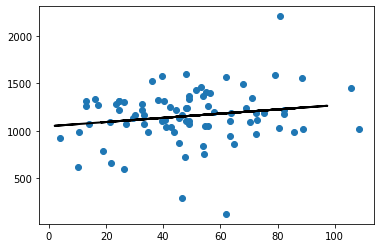

Accuracy: -0.047974249463767826
Mean Squared Error: 441.2252413262391


In [ ]:
# Regresion Lineal Simple de Proteinas
print("Modelo de regresion de las Proteinas")

# Train and Test
xTrain, xTest, yTrain, yTest, = train_test_split(xProt, y, test_size=.10, random_state=42)

# Fit and predict
linreg.fit(xTrain, yTrain)

# Make prediction
yPred = linreg.predict(xTest)

# Plot
plt.scatter(xTrain, yTrain)
plt.plot(xTest, yPred, color='black', linewidth=2)
plt.show()

print(f"Accuracy: {linreg.score(xTest, yTest)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(yTest, yPred))}")

Modelo de regresion de los Lipidos


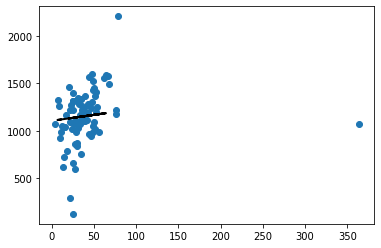

Accuracy: -0.03033270659309739
Mean Squared Error: 437.49569783249206


In [ ]:
# Regresion Lineal Simple de Lipidos
print("Modelo de regresion de los Lipidos")

# Train and Test
xTrain, xTest, yTrain, yTest, = train_test_split(xLip, y, test_size=.10, random_state=42)

# Fit and predict
linreg.fit(xTrain, yTrain)

# Make prediction
yPred = linreg.predict(xTest)

# Plot
plt.scatter(xTrain, yTrain)
plt.plot(xTest, yPred, color='black', linewidth=2)
plt.show()

print(f"Accuracy: {linreg.score(xTest, yTest)}")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(yTest, yPred))}")